In [4]:
# Importing required python libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Since the dataset is big, we will be building the model on Google colab. So importing file from Google drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# Please change the file path here
df = pd.read_csv('/content/drive/My Drive/data-capstone/creditcard.csv')
#df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Understanding & Data Cleaning

In [ ]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Comment: All the cells have no null values. We can observe that time is categorized as int in the columns as it is represented as the seconds elapsed between the first transaction in the data set and the subsequent transactions. 

In [ ]:
# View the statistical details for the numeric columns of the dataframe.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Comment: We can see that for the mean value for amount is ~88 but the maximum value is 25691 which shows the presence of outliers. 

Here we will observe the distribution of Class-1 & Class-0

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(classes)
print('%share of 0:',normal_share, 'and %share of 1:',fraud_share)

0    284315
1       492
Name: Class, dtype: int64
%share of 0: 99.82725143693798 and %share of 1: 0.1727485630620034


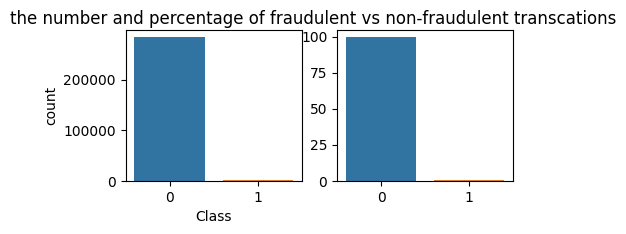

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(5,2),dpi=100)
plt.suptitle('the number and percentage of fraudulent vs non-fraudulent transcations')

plt.subplot(1, 2, 1)
sns.countplot(x=df['Class'], order=[0,1])
plt.subplot(1, 2, 2)
percentdist=[normal_share,fraud_share]
sns.barplot(x=classes.index, y=percentdist)

Comments: We can see data corresponding to Class-1 is only approx. 0.17% of total dataset. That means the dataset is having high Class imbalance.

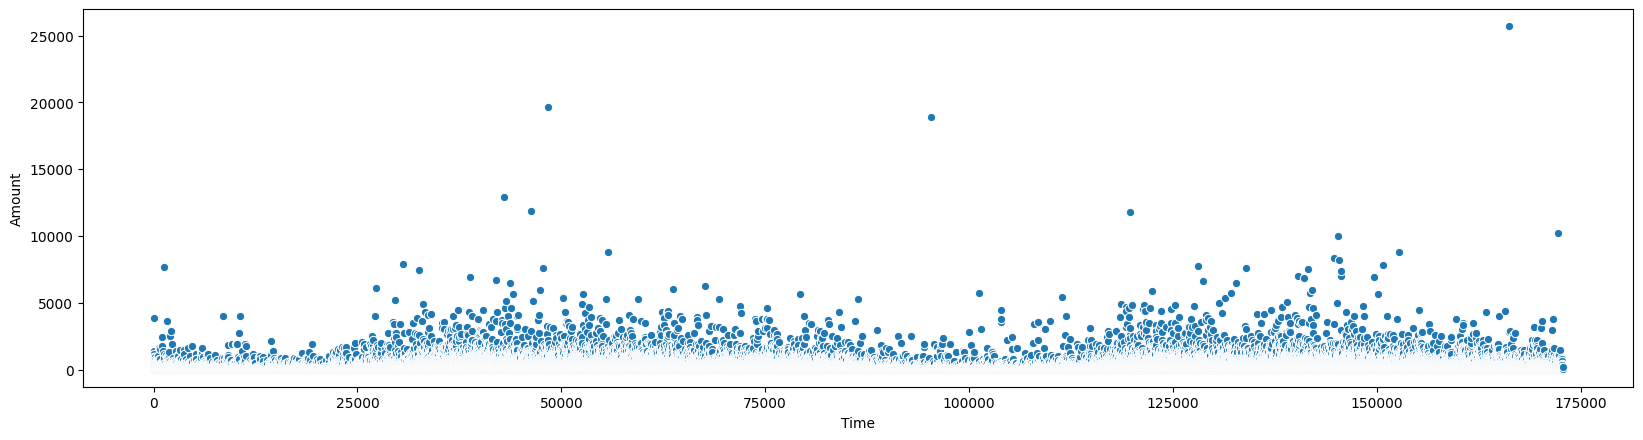

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(20,5),dpi=100)
sns.scatterplot(x=df['Time'],y=df['Amount'])

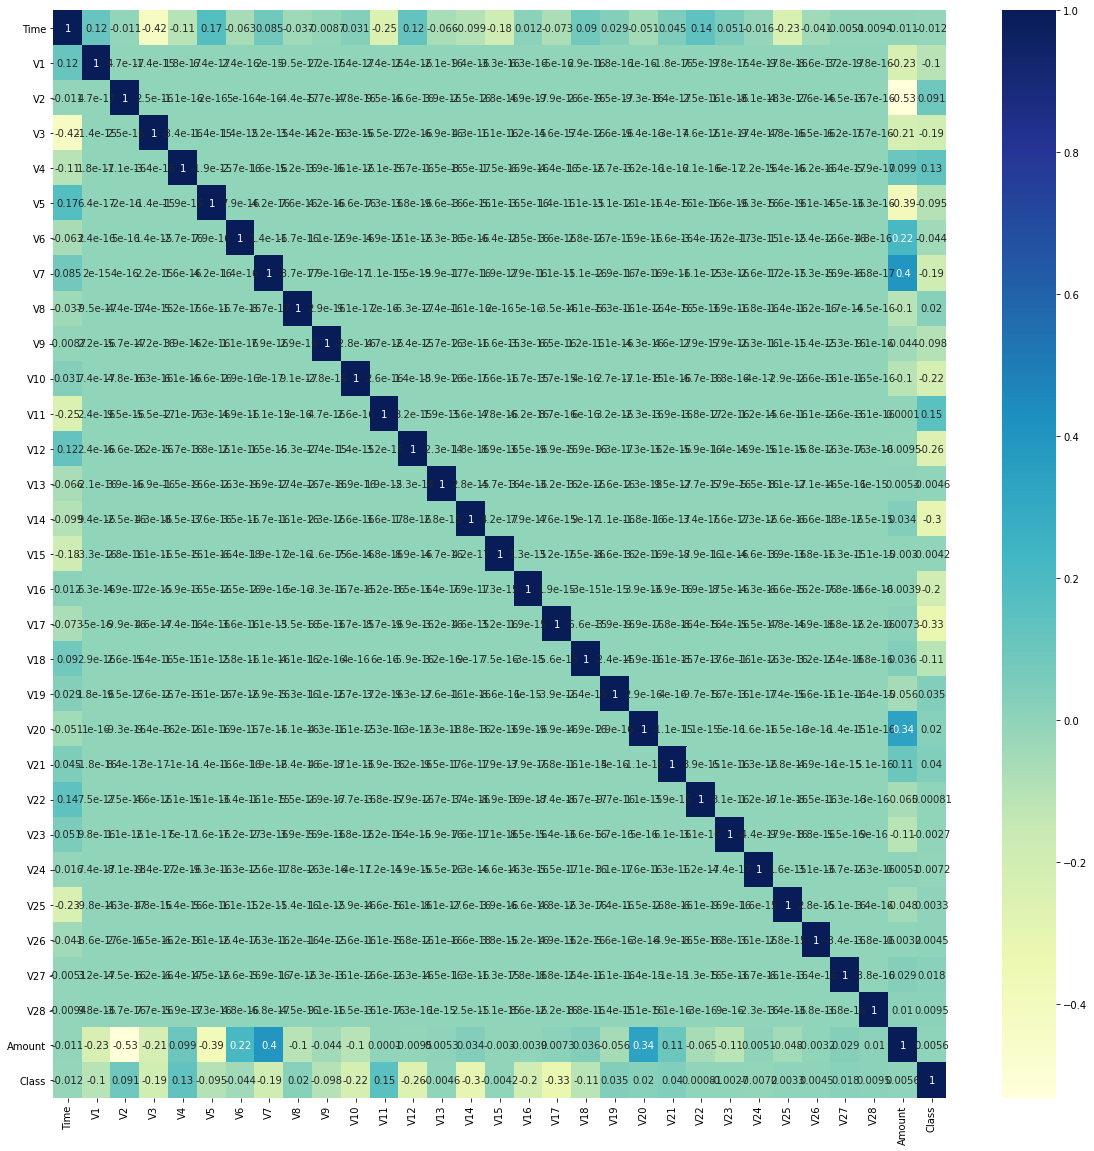

In [ ]:
# Checking the correlation between the variables
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Comment: There is not much correlations between the variables V1 to V28 as these are PCA transformed variables.

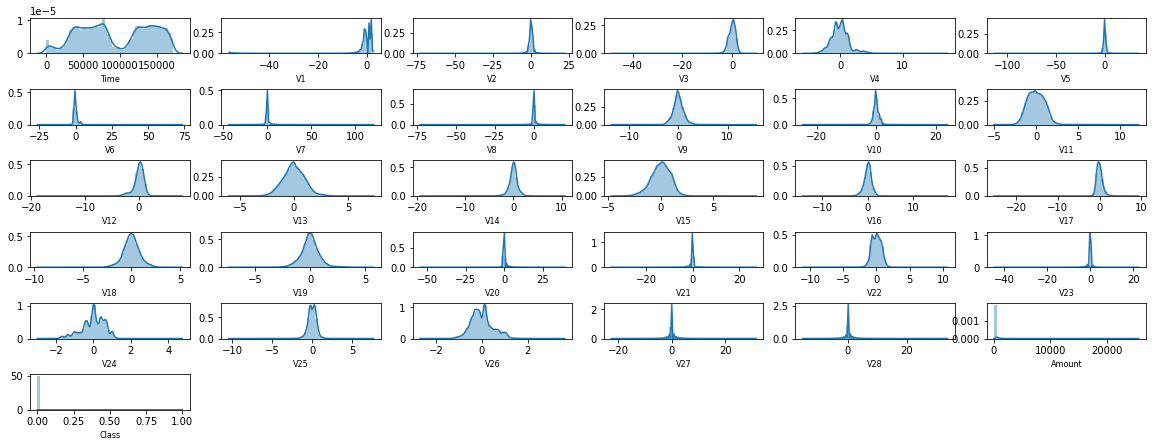

In [ ]:
#Distribution plot of columns

fig = plt.figure(figsize=(20,40))

rowcnt=len(df.columns)
colcnt=6
subcnt=1

for i in df.columns:
    fig.add_subplot(rowcnt,colcnt,subcnt)
    
    plt.xlabel(i, fontsize=8)
    sns.distplot(df[i])
    subcnt = subcnt + 1
 
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.show()

In [ ]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

Comment: We can observe that the data is skewed for almost all the variables. We are more concerned with the skewness of the V1-V28 and the amount value. And skewness of class is not relevant. 

#### Dropping Unnecessary columns:
We can remove the time column as it does not add value to the further analysis


In [6]:
df=df.drop('Time', axis=1)

Prior to working on skweness on data,we will just check the outliers present in the data.

In [7]:
col=df.columns
col=col.drop('Class')

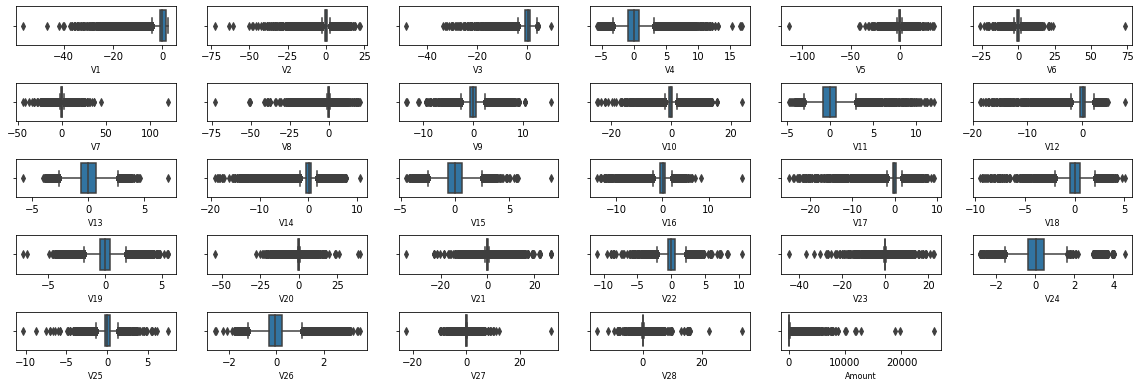

In [ ]:
#Box plot of columns

fig = plt.figure(figsize=(20,40))

rowcnt=len(col)
colcnt=6
subcnt=1

for i in col:
    fig.add_subplot(rowcnt,colcnt,subcnt)
    
    plt.xlabel(i, fontsize=8)
    sns.boxplot(df[i])
    subcnt = subcnt + 1

plt.subplots_adjust(wspace=0.2, hspace=1)
plt.show()

### Splitting the data into train & test data

In [8]:
y= df['Class']
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
X=df.drop('Class', axis=1)

Comment: We can observe that the skewness in the data has reduced signifcantly now.

In [10]:
from sklearn import model_selection

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7,
                                                     test_size = 0.3, random_state=100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print('No. of rows having Class-1 label:', np.sum(y))
print('No. of rows having Class-1 label in train dataset:', np.sum(y_train))
print('No. of rows having Class-1 label in test dataset:', np.sum(y_test))

No. of rows having Class-1 label: 492
No. of rows having Class-1 label in train dataset: 344
No. of rows having Class-1 label in test dataset: 148


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [11]:
# Applying PowerTransformer to fit & transform the data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit_transform(X_train)

array([[ 1.44569155, -0.17985939, -0.82537101, ..., -0.21338865,
        -0.18593313, -1.44748939],
       [-0.1685569 ,  0.70771555, -0.415595  , ...,  0.57666235,
         0.28299091, -1.13077718],
       [ 1.54055149,  0.05920404, -1.39766213, ..., -0.23217377,
        -0.20541154, -0.86502161],
       ...,
       [ 0.44926405, -0.65653239,  0.44059444, ...,  0.09733236,
         0.20682708,  1.18854512],
       [ 0.22075551, -0.98861027,  0.05561301, ..., -0.18686459,
         0.25017814,  1.56343857],
       [-0.45562581,  0.76260283,  0.24868191, ..., -0.11534124,
        -1.54276014, -1.31557838]])

In [ ]:
X_train.skew()

V1       -0.218659
V2        0.348200
V3       -0.079351
V4        0.018358
V5       -0.346900
V6       -1.993752
V7        0.606021
V8        2.389016
V9       -0.060698
V10      -1.356770
V11       0.057088
V12       0.165318
V13       0.005926
V14       0.108003
V15       0.009912
V16       0.027145
V17      -0.825831
V18      -0.057166
V19       0.016302
V20      -0.481587
V21      -2.081382
V22      -0.019893
V23      -0.020900
V24       0.123275
V25       0.082718
V26      -0.023450
V27       1.326715
V28       1.207900
Amount    0.017888
dtype: float64

Comment: We can observe that the skewness in the data has reduced signifcantly now.

## Model Building


### We will explore the following algorithms by building the models:
- Logistic Regression 
- KNN
- Decision Tree
- Random Forest
- XGBoost

We will build the model on:
- Original unbalanced dataset
- dataset after applying balancing techniques i.e. Random oversamping, SMOTE and Adasyn

We will also try both GridSearchCV and RandomizedSearchCV for Cross validation for hyperparameter tuning.

### Building different models on the imbalanced dataset first

### Logistic Regression- Imbalanced dataset

In [12]:
# Importing required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Logistic Regression

cv_num =   StratifiedKFold(5)

param={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr=LogisticRegression(solver='lbfgs')
model_cv1 = RandomizedSearchCV(estimator = lr, 
                        param_distributions =param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scori

In [ ]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results = cv_results[cv_results['param_C']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.563722,0.018829,0.021941,0.000521,0.001,{'C': 0.001},0.957761,0.978748,0.996783,0.965941,0.981420,0.976131,0.013436,3,0.983227,0.981330,0.977016,0.984278,0.978914,0.980953,0.002684
1,0.789152,0.076804,0.021460,0.000187,0.01,{'C': 0.01},0.958640,0.985206,0.996880,0.976801,0.977127,0.978931,0.012498,1,0.987285,0.983946,0.981031,0.986313,0.984702,0.984656,0.002159
2,1.147239,0.082224,0.021450,0.000284,0.1,{'C': 0.1},0.957768,0.984528,0.995831,0.972322,0.973939,0.976878,0.012746,2,0.985933,0.983150,0.980043,0.985900,0.984103,0.983826,0.002172
3,1.223583,0.110817,0.021475,0.000216,1,{'C': 1},0.956970,0.984016,0.995535,0.969763,0.972983,0.975853,0.013084,4,0.985150,0.982654,0.979390,0.985580,0.983516,0.983258,0.002208
4,1.245781,0.094929,0.024486,0.003977,10,{'C': 10},0.956839,0.983939,0.995500,0.969415,0.972875,0.975714,0.013139,5,0.985049,0.982586,0.979303,0.985537,0.983443,0.983184,0.002213


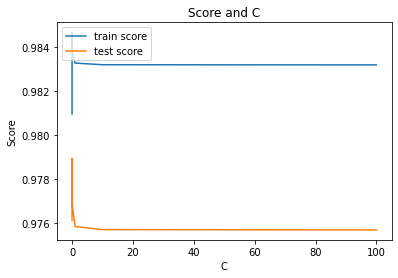

In [ ]:
# plotting mean test and train scoes with C
cv_results['param_C'] = cv_results['param_C'].astype('int32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.title("Score and C")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cv1.best_score_,'using',model_cv1.best_params_)

We can get auc of 0.9789307857864149 using {'C': 0.01}


## KNN- Imbalanced dataset

In [13]:
# Importing required package
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# KNN 
parameters = {'n_neighbors':[3,5,7]}
knn=KNeighborsClassifier()
cv_num =   StratifiedKFold(5)
model_cv2 =  RandomizedSearchCV(knn, 
                                param_distributions =parameters, 
                                cv=cv_num, 
                                return_train_score=True,
                                verbose = 1, n_jobs=-1)
model_cv2.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 114.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7]},
                   return_train_score=True, verbose=1)

In [15]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.452921,0.279431,550.147643,13.804187,3,{'n_neighbors': 3},0.999373,0.999599,0.999473,0.999423,...,0.999488,0.000086,1,0.999655,0.999605,0.999611,0.999649,0.999618,0.999628,0.000020
1,6.285510,2.133027,692.496303,44.286922,5,{'n_neighbors': 5},0.999448,0.999624,0.999448,0.999323,...,0.999473,0.000099,2,0.999592,0.999536,0.999523,0.999536,0.999542,0.999546,0.000024
2,9.116335,1.047031,808.624987,38.873014,7,{'n_neighbors': 7},0.999448,0.999523,0.999323,0.999248,...,0.999413,0.000111,3,0.999517,0.999455,0.999498,0.999511,0.999498,0.999496,0.000022


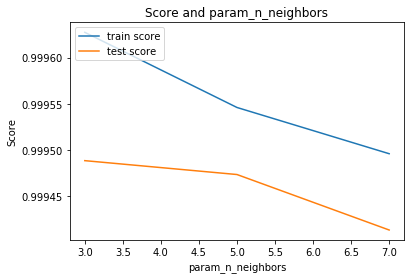

In [16]:
# plotting mean test and train scoes with C
cv_results2['param_n_neighbors'] = cv_results2['param_n_neighbors'].astype('int32')

# plotting
plt.plot(cv_results2['param_n_neighbors'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_n_neighbors'], cv_results2['mean_test_score'])
plt.xlabel('param_n_neighbors')
plt.ylabel('Score')
plt.title("Score and param_n_neighbors")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [17]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cv2.best_score_,'using',model_cv2.best_params_)

We can get auc of 0.9994883734538943 using {'n_neighbors': 3}


## Decision Tree- Imbalanced dataset

In [ ]:
# Importing required package
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree

cv_num =   StratifiedKFold(5)

param={'max_depth': range(1, 15)}

dt= DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

model_cv4 = GridSearchCV(estimator = dt, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv4.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  5.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
        

In [ ]:
cv_results4 = pd.DataFrame(model_cv4.cv_results_)
cv_results4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.244885,0.009256,0.016518,0.000498,1,{'max_depth': 1},0.804222,0.862218,0.811393,0.804185,0.845488,0.825501,0.023891,14,0.834423,0.814423,0.832620,0.847116,0.824147,0.830546,0.010907
1,2.452217,0.014653,0.016455,0.000314,2,{'max_depth': 2},0.876709,0.905728,0.876658,0.833167,0.882267,0.874906,0.023463,7,0.878083,0.868992,0.878093,0.894431,0.873102,0.878540,0.008645
2,3.603069,0.012598,0.016572,0.000310,3,{'max_depth': 3},0.876680,0.941924,0.949059,0.876576,0.911598,0.911168,0.030880,1,0.921683,0.908936,0.907142,0.927112,0.916507,0.916276,0.007537
3,4.810168,0.015208,0.017319,0.000886,4,{'max_depth': 4},0.876615,0.927462,0.934650,0.832861,0.882251,0.890768,0.037144,3,0.928960,0.912633,0.909008,0.936074,0.920200,0.921375,0.010043
4,5.967707,0.014394,0.019818,0.004717,5,{'max_depth': 5},0.894738,0.889795,0.941908,0.818355,0.911591,0.891277,0.040763,2,0.957467,0.943026,0.914576,0.937937,0.923850,0.935371,0.014957


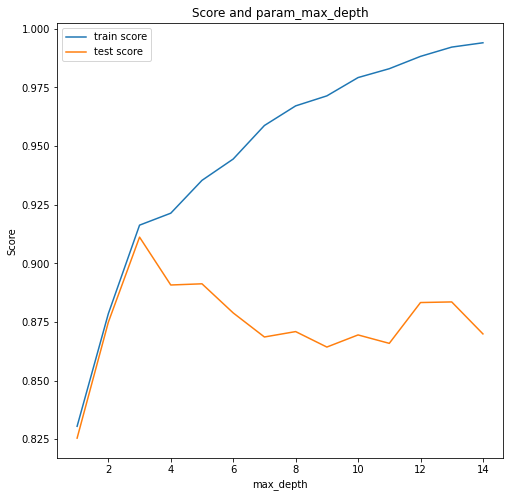

In [ ]:
cv_results4['param_max_depth'] = cv_results4['param_max_depth'].astype('int32')

# plotting
plt.figure(figsize=(8,8))
plt.plot(cv_results4['param_max_depth'], cv_results4['mean_train_score'])
plt.plot(cv_results4['param_max_depth'], cv_results4['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cv4.best_score_,'using',model_cv4.best_params_)

We can get auc of 0.9111675652727349 using {'max_depth': 3}


## Random Forest- Imbalanced dataset

In [ ]:
# Importing required package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random forest

cv_num =   StratifiedKFold(5)

param={'max_depth': range(2, 20, 5)}

rf= RandomForestClassifier(warm_start=True)

model_cv5 = GridSearchCV(estimator = rf, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv5.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [ ]:
cv_results5 = pd.DataFrame(model_cv5.cv_results_)
cv_results5 = cv_results5[cv_results5['param_max_depth']<=20]
cv_results5.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.653061,0.263256,0.324925,0.011689,2,{'max_depth': 2},0.964702,0.952490,0.967928,0.889418,...,0.943153,0.028483,4,0.963365,0.929251,0.955106,0.947477,0.939356,0.946911,1.189252e-02
1,157.799855,11.612090,0.794284,0.159624,7,{'max_depth': 7},0.977811,0.974424,0.990763,0.957993,...,0.974676,0.010510,3,0.992593,0.990010,0.988960,0.989530,0.988355,0.989889,1.460912e-03
2,280.826787,5.682959,0.769803,0.025071,12,{'max_depth': 12},0.978816,0.981504,0.994518,0.967026,...,0.981556,0.009008,1,0.999979,0.999971,0.999931,0.999975,0.999967,0.999965,1.720834e-05
3,285.165347,32.226379,0.577346,0.153003,17,{'max_depth': 17},0.968409,0.980171,0.990807,0.963166,...,0.975824,0.009583,2,1.000000,0.999999,0.999998,0.999999,0.999999,0.999999,5.557444e-07


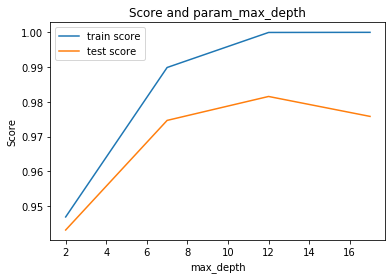

In [ ]:
cv_results5['param_max_depth'] = cv_results5['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_results5['param_max_depth'], cv_results5['mean_train_score'])
plt.plot(cv_results5['param_max_depth'], cv_results5['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cv5.best_score_,'using',model_cv5.best_params_)

We can get auc of 0.9815564740159433 using {'max_depth': 12}


## XG Boost- Imbalanced dataset

In [ ]:
# Importing XGboost classifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# XGboost

cv_num =   StratifiedKFold(5)

param={'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb= XGBClassifier(max_depth=2, n_estimators=200)

model_cv6 = GridSearchCV(estimator = xgb, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv6.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 26.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_we...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=No

In [ ]:
cv_results6 = pd.DataFrame(model_cv6.cv_results_)
cv_results6.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,157.769059,4.102089,0.366988,0.042082,0.01,0.3,"{'learning_rate': 0.01, 'subsample': 0.3}",0.905248,0.956146,0.956110,...,0.925330,0.026661,10,0.934135,0.928515,0.924885,0.937695,0.934288,0.931904,0.004582
1,211.405098,6.361917,0.380462,0.034333,0.01,0.6,"{'learning_rate': 0.01, 'subsample': 0.6}",0.898299,0.949097,0.956243,...,0.922647,0.026263,11,0.928901,0.919734,0.916043,0.932421,0.925426,0.924505,0.005953
2,244.341128,1.341051,0.414332,0.025582,0.01,0.9,"{'learning_rate': 0.01, 'subsample': 0.9}",0.898300,0.949116,0.956301,...,0.921269,0.026602,12,0.928910,0.917954,0.914348,0.932529,0.923759,0.923500,0.006714
3,155.254963,3.125834,0.570193,0.058770,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.983752,0.984733,0.996853,...,0.984355,0.007267,1,0.999018,0.998593,0.998189,0.999029,0.998432,0.998652,0.000329
4,212.872068,5.027632,0.569442,0.025649,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.977361,0.986645,0.995793,...,0.982888,0.008256,3,0.999098,0.999046,0.998191,0.999320,0.998762,0.998883,0.000389


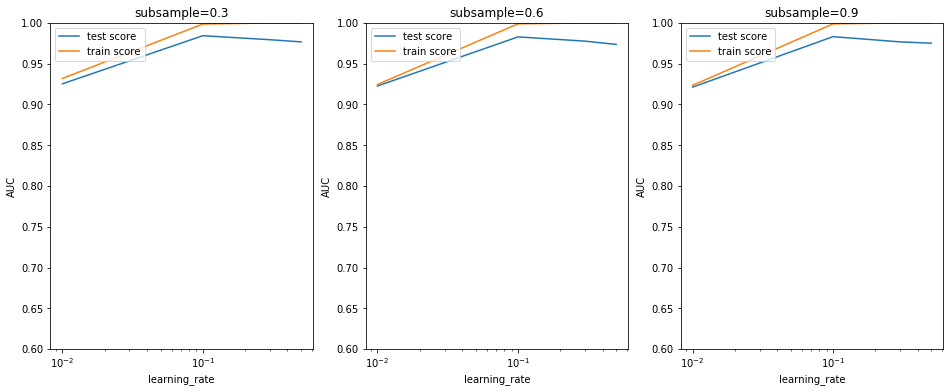

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param['subsample']):
    
    # subplot 1/n
    plt.subplot(1,len(param['subsample']), n+1)
    df = cv_results6[cv_results6['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cv6.best_score_,'using',model_cv6.best_params_)

We can get auc of 0.9843550998999959 using {'learning_rate': 0.1, 'subsample': 0.3}


Comment: We see from the different results that the highest AUC is acheived in the logistic regression and the XG Boost. 


KNN model took lot of time on unbalanced dataset. So we will not run KNN model on balanced dataset due to time and resource constraints

## Model building with balancing Classes
Now we will build the model after applying balancing techniques to the dataset.

#### Perform class balancing with following techniques:
- Random Oversampling
- SMOTE
- ADASYN

### Balancing Classes with Random Oversampling Technique

In [ ]:
# Balance classes on X_train & y_train using Random Oversampling

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42,sampling_strategy='minority')
X_bc1, y_bc1 = ros.fit_resample(X_train, y_train)

y_bc1

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([0, 0, 0, ..., 1, 1, 1])

## Logsitic regresion on balanced data-random oversampling

In [ ]:
# Logistic Regression on balanced data-random oversampling

# num_C = ______  #--> list of values
cv_num =   StratifiedKFold(5) #--> list of values

param={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr=LogisticRegression(solver='lbfgs')
model_cvros1 = GridSearchCV(estimator = lr, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvros1.fit(X_bc1, y_bc1) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   52.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
cv_resultsros1 = pd.DataFrame(model_cvros1.cv_results_)
cv_resultsros1 = cv_resultsros1[cv_resultsros1['param_C']<=200]
cv_resultsros1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.458906,0.160550,0.042337,0.000686,0.001,{'C': 0.001},0.987764,0.987431,0.987525,0.987292,0.986908,0.987384,0.000283,6,0.987295,0.987396,0.987358,0.987440,0.987505,0.987399,0.000071
1,3.302990,0.042925,0.044169,0.000565,0.01,{'C': 0.01},0.988517,0.988222,0.988355,0.988125,0.987743,0.988193,0.000260,5,0.988103,0.988215,0.988159,0.988250,0.988312,0.988208,0.000072
2,3.306494,0.149758,0.043051,0.001109,0.1,{'C': 0.1},0.988648,0.988356,0.988494,0.988269,0.987891,0.988332,0.000255,4,0.988239,0.988355,0.988297,0.988391,0.988445,0.988345,0.000072
3,3.385811,0.246238,0.042442,0.000653,1,{'C': 1},0.988661,0.988370,0.988506,0.988288,0.987907,0.988346,0.000253,3,0.988254,0.988371,0.988310,0.988407,0.988463,0.988361,0.000073
4,3.358956,0.138284,0.043152,0.001459,10,{'C': 10},0.988662,0.988373,0.988509,0.988290,0.987908,0.988348,0.000254,2,0.988255,0.988373,0.988311,0.988409,0.988465,0.988363,0.000073


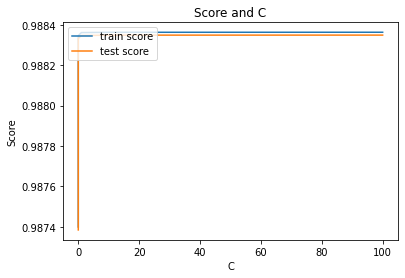

In [ ]:
# plotting mean test and train scoes with C
cv_resultsros1['param_C'] = cv_resultsros1['param_C'].astype('int32')

# plotting
plt.plot(cv_resultsros1['param_C'], cv_resultsros1['mean_train_score'])
plt.plot(cv_resultsros1['param_C'], cv_resultsros1['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.title("Score and C")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvros1.best_score_,'using',model_cvros1.best_params_)

We can get auc of 0.9883485470121048 using {'C': 100}


## Decision Tree balanced data-random oversampling

In [ ]:
# Decision Tree on balanced data-random oversampling

cv_num =   StratifiedKFold(5)

param={'max_depth': range(1, 10)}

dt= DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

model_cvros4 = GridSearchCV(estimator = dt, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvros4.fit(X_bc1, y_bc1) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
        

In [ ]:
cv_resultsros4 = pd.DataFrame(model_cvros4.cv_results_)
cv_resultsros4 = cv_resultsros4[cv_resultsros4['param_max_depth']<=10]
cv_resultsros4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.835814,0.020522,0.038880,0.004477,1,{'max_depth': 1},0.924882,0.924254,0.924832,0.924693,0.923802,0.924493,0.000410,9,0.924178,0.924332,0.924191,0.925221,0.925444,0.924673,0.000545
1,3.497382,0.021397,0.038358,0.000815,2,{'max_depth': 2},0.969839,0.970103,0.970995,0.963324,0.962990,0.967450,0.003528,8,0.969893,0.969826,0.969604,0.964542,0.964621,0.967697,0.002546
2,5.054839,0.030885,0.039663,0.001314,3,{'max_depth': 3},0.979270,0.979301,0.979788,0.973719,0.973591,0.977134,0.002847,7,0.979288,0.979280,0.979147,0.974734,0.974761,0.977442,0.002200
3,6.555705,0.024825,0.038932,0.001369,4,{'max_depth': 4},0.983135,0.983203,0.983443,0.984059,0.983943,0.983557,0.000379,6,0.983187,0.983170,0.983158,0.984415,0.984445,0.983675,0.000617
4,8.032261,0.052017,0.041211,0.001098,5,{'max_depth': 5},0.993657,0.994173,0.993536,0.994229,0.993936,0.993906,0.000274,5,0.993527,0.994070,0.993590,0.994374,0.994460,0.994004,0.000387


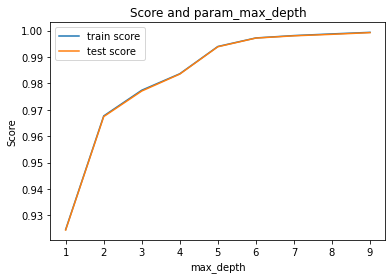

In [ ]:
cv_resultsros4['param_max_depth'] = cv_resultsros4['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultsros4['param_max_depth'], cv_resultsros4['mean_train_score'])
plt.plot(cv_resultsros4['param_max_depth'], cv_resultsros4['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvros4.best_score_,'using',model_cvros4.best_params_)

We can get auc of 0.9992550447625483 using {'max_depth': 9}


## Random forest balanced data-random oversampling

In [ ]:
# Random forest on balanced data-random oversampling

cv_num =   StratifiedKFold(5)

param={'max_depth': range(2, 20, 5)}

rf= RandomForestClassifier(warm_start=True)

model_cvros5 = GridSearchCV(estimator = rf, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvros5.fit(X_bc1, y_bc1) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [ ]:
cv_resultsros5 = pd.DataFrame(model_cvros5.cv_results_)
cv_resultsros5 = cv_resultsros5[cv_resultsros5['param_max_depth']<=20]
cv_resultsros5.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.162307,0.960019,0.529895,0.024459,2,{'max_depth': 2},0.980284,0.979936,0.982579,0.981014,0.979580,0.980679,1.061982e-03,4,0.980168,0.979531,0.982004,0.981189,0.980768,0.980732,8.474615e-04
1,125.796839,1.306326,0.696306,0.014977,7,{'max_depth': 7},0.999254,0.999234,0.999422,0.999208,0.999302,0.999284,7.556981e-05,3,0.999232,0.999222,0.999453,0.999326,0.999329,0.999313,8.336769e-05
2,171.924899,1.904735,0.869112,0.006039,12,{'max_depth': 12},0.999997,0.999998,0.999981,0.999995,0.999994,0.999993,6.281623e-06,2,0.999998,0.999998,0.999999,0.999999,0.999997,0.999998,5.382616e-07
3,176.449268,7.717306,0.897344,0.076217,17,{'max_depth': 17},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.979124e-08,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.021667e-17


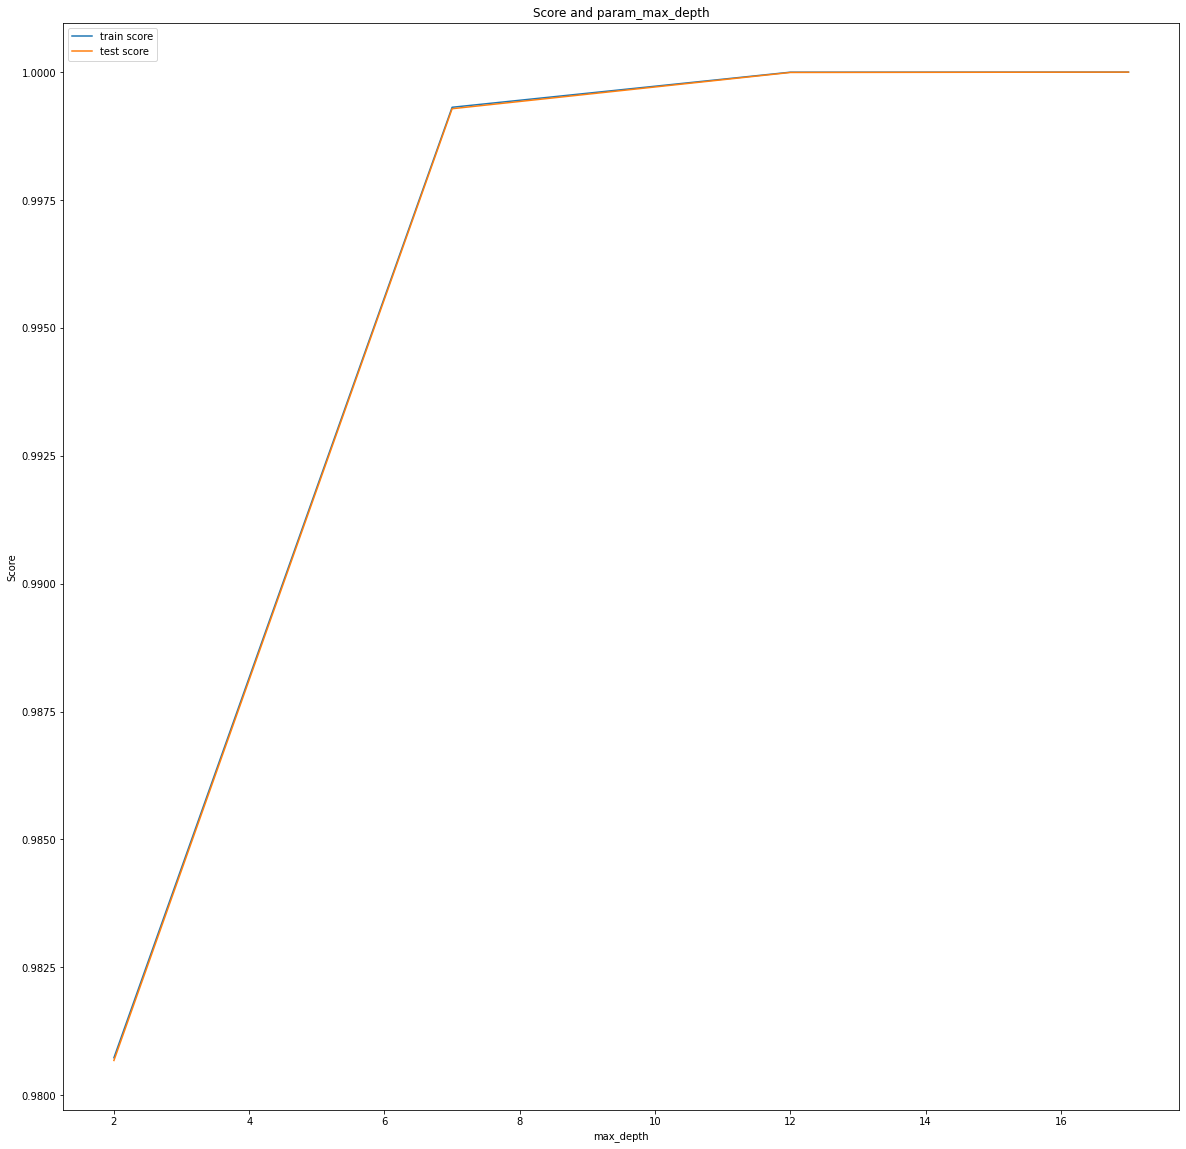

In [ ]:
cv_resultsros5['param_max_depth'] = cv_resultsros5['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultsros5['param_max_depth'], cv_resultsros5['mean_train_score'])
plt.plot(cv_resultsros5['param_max_depth'], cv_resultsros5['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvros5.best_score_,'using',model_cvros5.best_params_)

We can get auc of 0.9999999851043805 using {'max_depth': 17}


## XG Boost balanced data-random oversampling

In [ ]:
# XGboost classifier on balanced data-random oversampling

cv_num =   StratifiedKFold(5)

param={'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]}

# specifying model
xgb= XGBClassifier(max_depth=2, n_estimators=150)

model_cvros6 = GridSearchCV(estimator = xgb, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvros6.fit(X_bc1, y_bc1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 40.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=150, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'subsample': [0.

In [ ]:
cv_resultsros6 = pd.DataFrame(model_cvros6.cv_results_)
cv_resultsros6.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,67.012190,0.485926,0.264835,0.014035,0.01,0.3,"{'learning_rate': 0.01, 'subsample': 0.3}",0.988177,0.988071,0.988371,0.987617,0.987624,0.987972,0.000303,10,0.988044,0.987929,0.987833,0.988072,0.988072,0.987990,0.000095
1,81.969690,0.663864,0.262597,0.007766,0.01,0.6,"{'learning_rate': 0.01, 'subsample': 0.6}",0.988051,0.987875,0.988226,0.987404,0.987535,0.987818,0.000308,11,0.987895,0.987746,0.987681,0.987842,0.987985,0.987830,0.000108
2,84.832393,0.967503,0.270323,0.011763,0.01,0.9,"{'learning_rate': 0.01, 'subsample': 0.9}",0.987961,0.987723,0.988202,0.987513,0.987411,0.987762,0.000290,12,0.987813,0.987612,0.987701,0.987944,0.987873,0.987789,0.000119
3,67.565160,0.391531,0.422850,0.017160,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999497,0.999524,0.999401,0.999431,0.999561,0.999483,0.000059,7,0.999474,0.999507,0.999476,0.999489,0.999506,0.999490,0.000014
4,84.316020,0.483832,0.414113,0.007150,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999490,0.999519,0.999430,0.999455,0.999512,0.999481,0.000034,8,0.999473,0.999492,0.999499,0.999495,0.999465,0.999485,0.000013


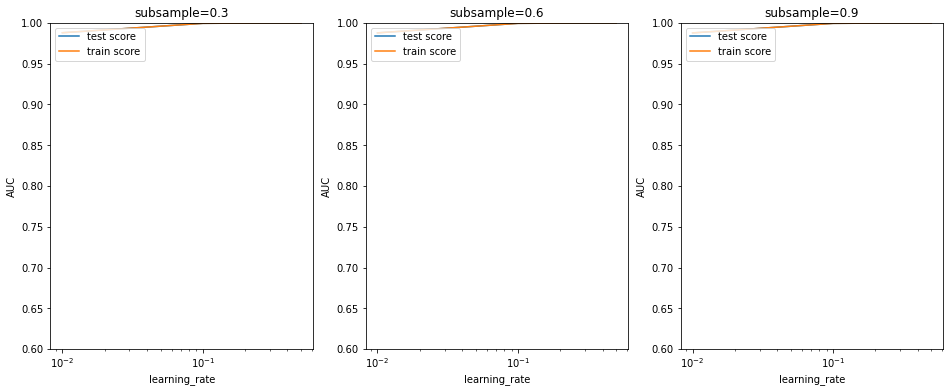

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param['subsample']):
    
    # subplot 1/n
    plt.subplot(1,len(param['subsample']), n+1)
    df = cv_resultsros6[cv_resultsros6['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvros6.best_score_,'using',model_cvros6.best_params_)

We can get auc of 0.9999714971059934 using {'learning_rate': 0.5, 'subsample': 0.6}


## Balancing Classes with SMOTE Technique

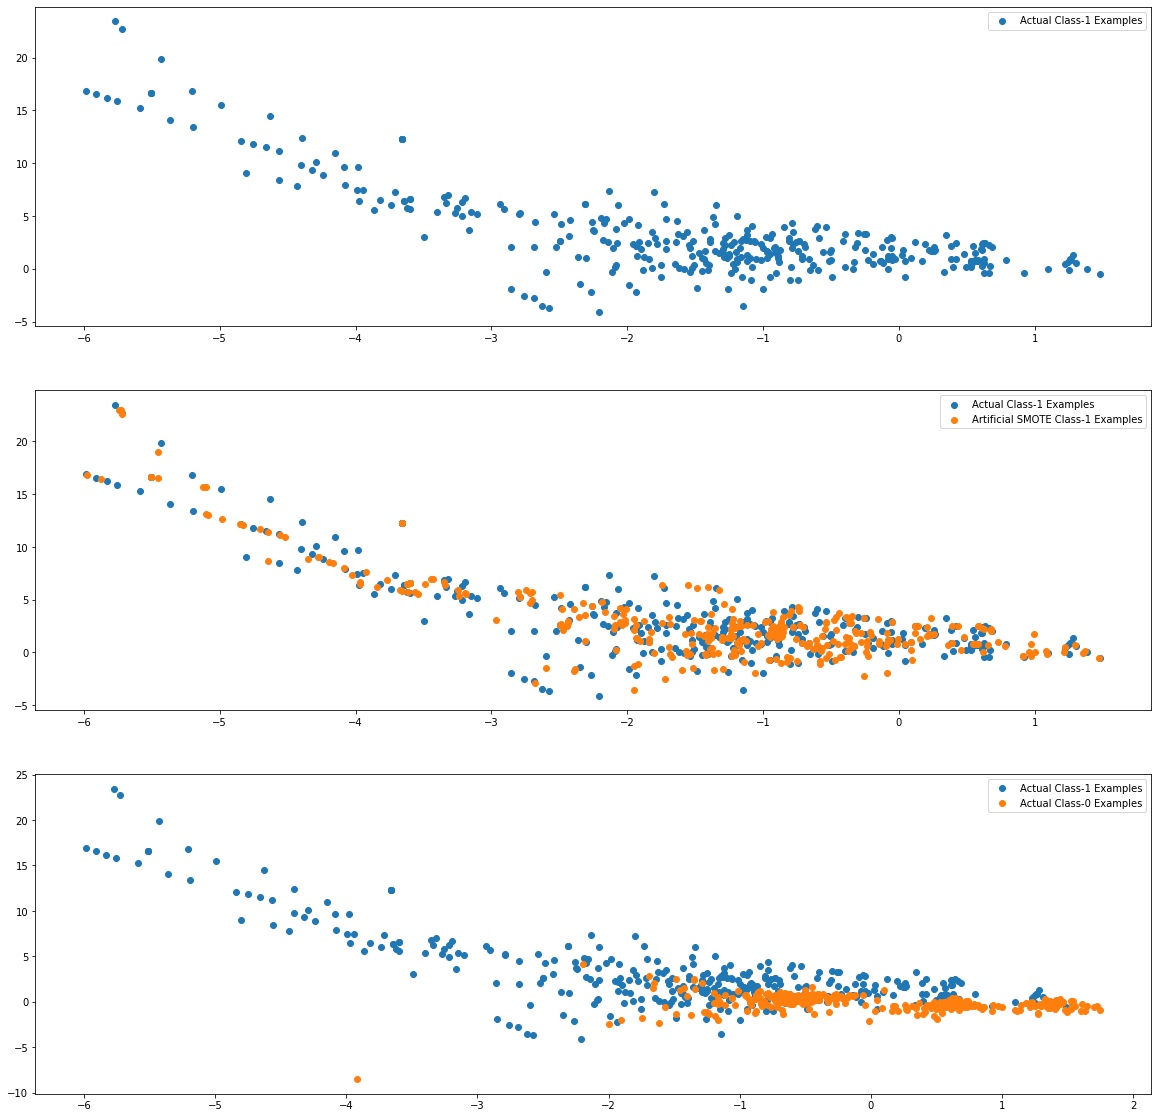

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sm = over_sampling.SMOTE(random_state=0,sampling_strategy='minority')
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logsitic regresion on balanced data-SMOTE

In [ ]:
# Logistic Regression on balanced data-SMOTE

cv_num =   StratifiedKFold(5)

param={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr=LogisticRegression(solver='lbfgs')
model_cvsmo1 = GridSearchCV(estimator = lr, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvsmo1.fit(X_train_smote, y_train_smote) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
cv_resultssmo1 = pd.DataFrame(model_cvsmo1.cv_results_)
cv_resultssmo1 = cv_resultssmo1[cv_resultssmo1['param_C']<=200]
cv_resultssmo1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.799851,0.043139,0.037258,0.001331,0.001,{'C': 0.001},0.989967,0.989644,0.990194,0.989098,0.989745,0.989730,0.000368,6,0.989672,0.989724,0.989662,0.989891,0.989778,0.989746,0.000084
1,2.185490,0.061327,0.036397,0.000678,0.01,{'C': 0.01},0.990527,0.990245,0.990731,0.989773,0.990324,0.990320,0.000321,5,0.990269,0.990314,0.990259,0.990478,0.990363,0.990337,0.000080
2,2.351351,0.085393,0.036315,0.000969,0.1,{'C': 0.1},0.990604,0.990333,0.990798,0.989876,0.990410,0.990404,0.000309,4,0.990355,0.990399,0.990342,0.990561,0.990447,0.990421,0.000079
3,2.382515,0.048193,0.036478,0.000542,1,{'C': 1},0.990611,0.990341,0.990804,0.989886,0.990419,0.990412,0.000308,3,0.990364,0.990407,0.990350,0.990569,0.990455,0.990429,0.000079
4,2.335718,0.077800,0.036574,0.000281,10,{'C': 10},0.990612,0.990342,0.990804,0.989887,0.990420,0.990413,0.000308,2,0.990365,0.990408,0.990351,0.990570,0.990456,0.990430,0.000079


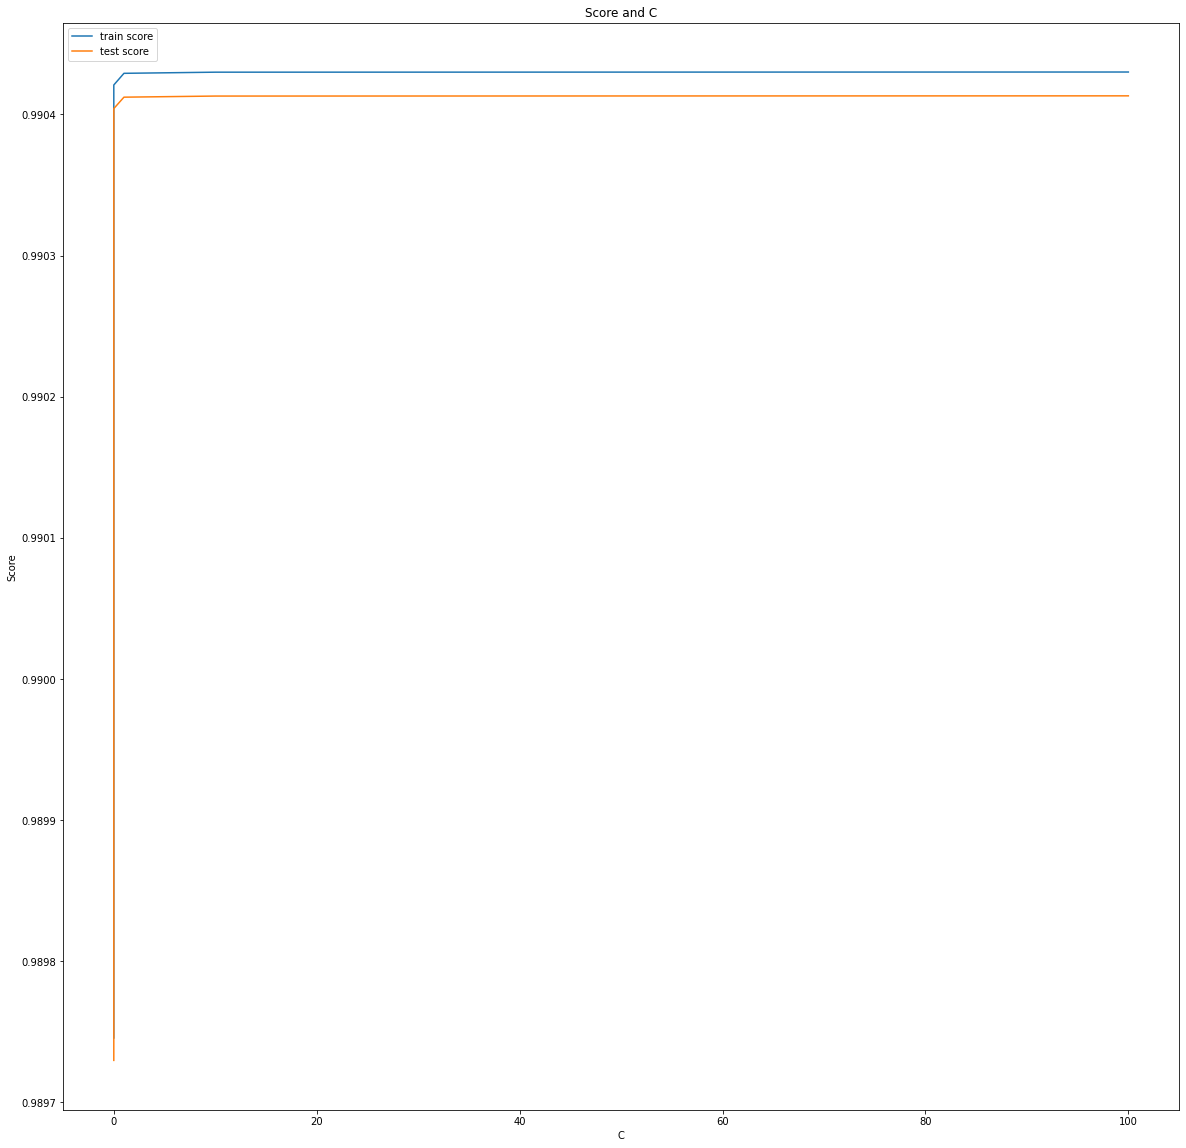

In [ ]:
# plotting mean test and train scoes with C
cv_resultssmo1['param_C'] = cv_resultssmo1['param_C'].astype('int32')

# plotting
plt.plot(cv_resultssmo1['param_C'], cv_resultssmo1['mean_train_score'])
plt.plot(cv_resultssmo1['param_C'], cv_resultssmo1['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.title("Score and C")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvsmo1.best_score_,'using',model_cvsmo1.best_params_)

We can get auc of 0.9904131983984108 using {'C': 100}


## Decision Tree balanced data-SMOTE

In [ ]:
# Decision Tree on balanced data-SMOTE

cv_num =   StratifiedKFold(5)

param={'max_depth': range(1, 10)}

dt= DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

model_cvsmo4 = GridSearchCV(estimator = dt, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvsmo4.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
        

In [ ]:
cv_resultssmo4 = pd.DataFrame(model_cvsmo4.cv_results_)
cv_resultssmo4 = cv_resultssmo4[cv_resultssmo4['param_max_depth']<=10]
cv_resultssmo4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.760057,0.038433,0.037125,0.003051,1,{'max_depth': 1},0.926012,0.926892,0.926414,0.924568,0.926377,0.926053,0.000793,9,0.926144,0.925925,0.925940,0.926575,0.926053,0.926127,0.000237
1,5.268987,0.042599,0.038738,0.000866,2,{'max_depth': 2},0.959182,0.959146,0.958967,0.957260,0.958298,0.958571,0.000728,8,0.958665,0.958472,0.958431,0.958984,0.958685,0.958647,0.000196
2,7.753068,0.079701,0.039697,0.002963,3,{'max_depth': 3},0.971915,0.972000,0.973113,0.970675,0.971554,0.971852,0.000786,7,0.971900,0.971982,0.971846,0.972190,0.972121,0.972008,0.000130
3,10.102638,0.061659,0.039712,0.000674,4,{'max_depth': 4},0.979420,0.983427,0.984008,0.982613,0.979026,0.981699,0.002073,6,0.979382,0.983668,0.983543,0.983947,0.979731,0.982054,0.002047
4,12.528316,0.106288,0.040662,0.000794,5,{'max_depth': 5},0.986842,0.986602,0.986980,0.985725,0.986286,0.986487,0.000448,5,0.986240,0.986882,0.986663,0.986900,0.986692,0.986676,0.000238


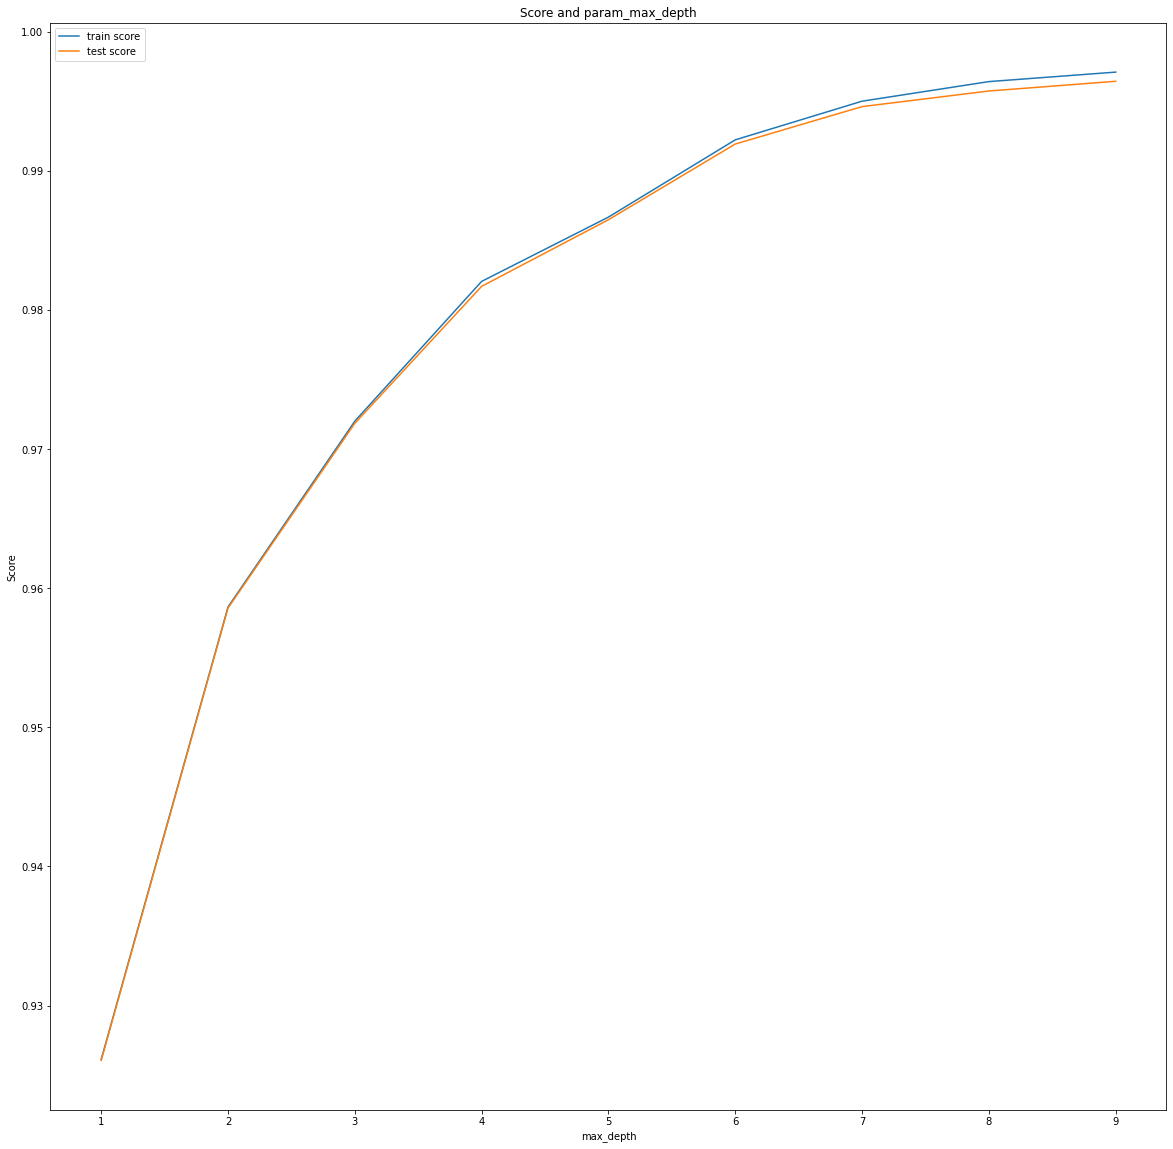

In [ ]:
cv_resultssmo4['param_max_depth'] = cv_resultssmo4['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultssmo4['param_max_depth'], cv_resultssmo4['mean_train_score'])
plt.plot(cv_resultssmo4['param_max_depth'], cv_resultssmo4['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvsmo4.best_score_,'using',model_cvsmo4.best_params_)

We can get auc of 0.9964382544738537 using {'max_depth': 9}


## Random forest balanced data-SMOTE

In [ ]:
# Random forest on balanced data-SMOTE

cv_num =   StratifiedKFold(5)

param={'max_depth': range(2, 20, 5)}

rf= RandomForestClassifier(warm_start=True)

model_cvsmo5 = GridSearchCV(estimator = rf, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvsmo5.fit(X_train_smote, y_train_smote) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 40.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [ ]:
cv_resultssmo5 = pd.DataFrame(model_cvsmo5.cv_results_)
cv_resultssmo5 = cv_resultssmo5[cv_resultssmo5['param_max_depth']<=20]
cv_resultssmo5.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,66.907260,0.259967,0.607928,0.014994,2,{'max_depth': 2},0.972270,0.971505,0.975563,0.971697,0.972668,0.972740,0.001470,4,0.971495,0.972060,0.975307,0.972581,0.972823,0.972853,1.309456e-03
1,203.490596,1.461936,0.817236,0.018855,7,{'max_depth': 7},0.997563,0.997510,0.997532,0.997339,0.997557,0.997500,0.000083,3,0.997514,0.997549,0.997666,0.997581,0.997656,0.997593,5.909764e-05
2,311.947036,3.423893,1.068244,0.065579,12,{'max_depth': 12},0.999961,0.999954,0.999912,0.999938,0.999943,0.999942,0.000017,2,0.999974,0.999967,0.999969,0.999965,0.999961,0.999967,4.176975e-06
3,353.074829,20.995954,1.108519,0.125433,17,{'max_depth': 17},0.999998,0.999998,0.999963,0.999993,0.999997,0.999990,0.000013,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.571942e-08


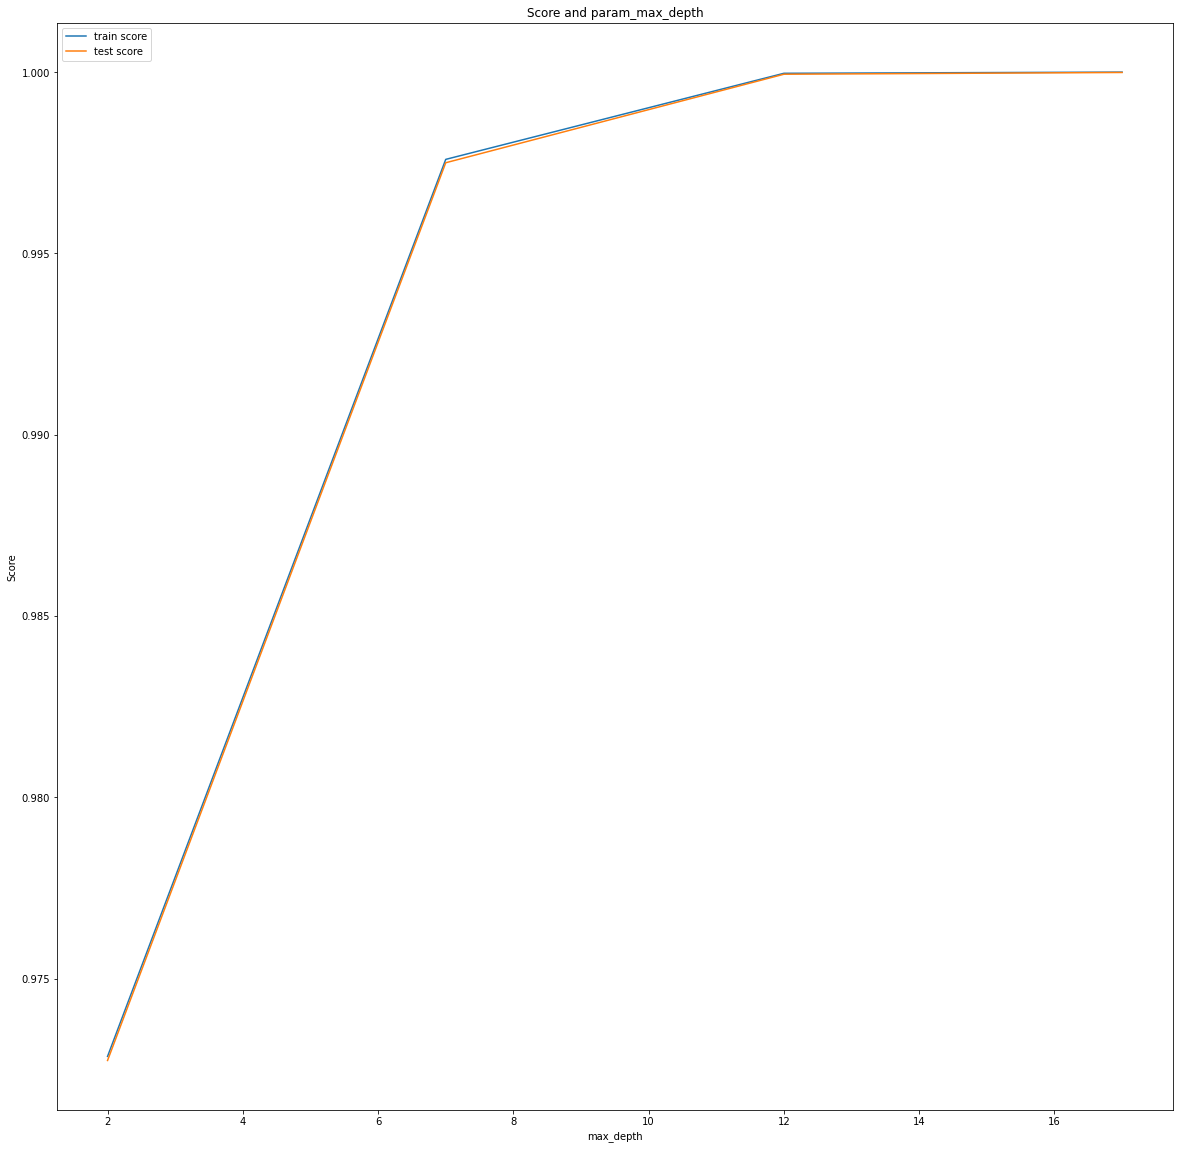

In [ ]:
cv_resultssmo5['param_max_depth'] = cv_resultssmo5['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultssmo5['param_max_depth'], cv_resultssmo5['mean_train_score'])
plt.plot(cv_resultssmo5['param_max_depth'], cv_resultssmo5['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvsmo5.best_score_,'using',model_cvsmo5.best_params_)

We can get auc of 0.9999898293215492 using {'max_depth': 17}


## XG Boost balanced data-SMOTE

In [ ]:
# XGboost classifier on balanced data-SMOTE

cv_num =   StratifiedKFold(5)

param={'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb= XGBClassifier(max_depth=2, n_estimators=200)

model_cvsmo6 = GridSearchCV(estimator = xgb, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvsmo6.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 67.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'subsample': [0.

In [ ]:
cv_resultssmo6 = pd.DataFrame(model_cvsmo6.cv_results_)
cv_resultssmo6.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,101.535206,0.582849,0.356732,0.006623,0.01,0.3,"{'learning_rate': 0.01, 'subsample': 0.3}",0.987422,0.987409,0.988037,0.987112,0.987641,0.987524,0.000307,10,0.987296,0.987438,0.987575,0.987913,0.987711,0.987587,0.000214
1,136.257470,0.841126,0.344607,0.002010,0.01,0.6,"{'learning_rate': 0.01, 'subsample': 0.6}",0.987458,0.987379,0.987839,0.986952,0.987321,0.987390,0.000284,11,0.987383,0.987430,0.987405,0.987760,0.987406,0.987477,0.000142
2,153.268155,1.720972,0.346351,0.004480,0.01,0.9,"{'learning_rate': 0.01, 'subsample': 0.9}",0.987443,0.987370,0.987760,0.986761,0.987404,0.987348,0.000325,12,0.987327,0.987419,0.987314,0.987579,0.987502,0.987428,0.000101
3,101.280002,0.684467,0.552250,0.013561,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999032,0.998994,0.998906,0.998899,0.998955,0.998957,0.000051,7,0.999011,0.999007,0.998992,0.998993,0.998985,0.998997,0.000010
4,138.497060,1.379932,0.547807,0.005830,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.998978,0.998944,0.998897,0.998841,0.998938,0.998920,0.000047,8,0.998965,0.998960,0.998999,0.998972,0.998961,0.998971,0.000014


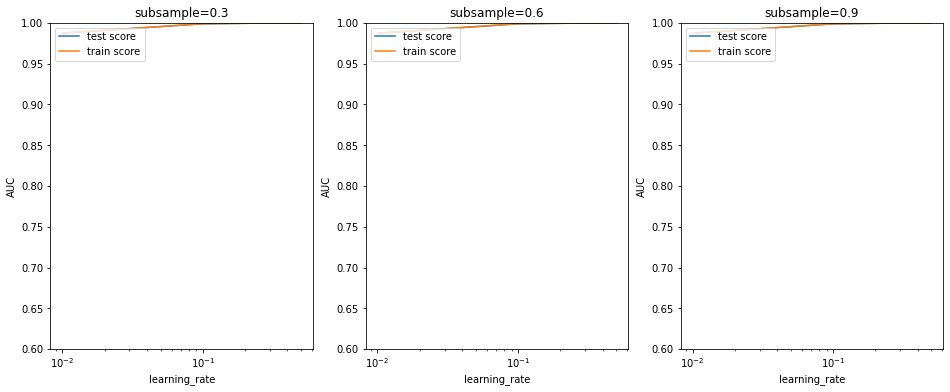

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param['subsample']):
    
    # subplot 1/n
    plt.subplot(1,len(param['subsample']), n+1)
    df = cv_resultssmo6[cv_resultssmo6['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvsmo6.best_score_,'using',model_cvsmo6.best_params_)

We can get auc of 0.9999493209369866 using {'learning_rate': 0.5, 'subsample': 0.6}


## Balancing Classes with ADASYN Technique 

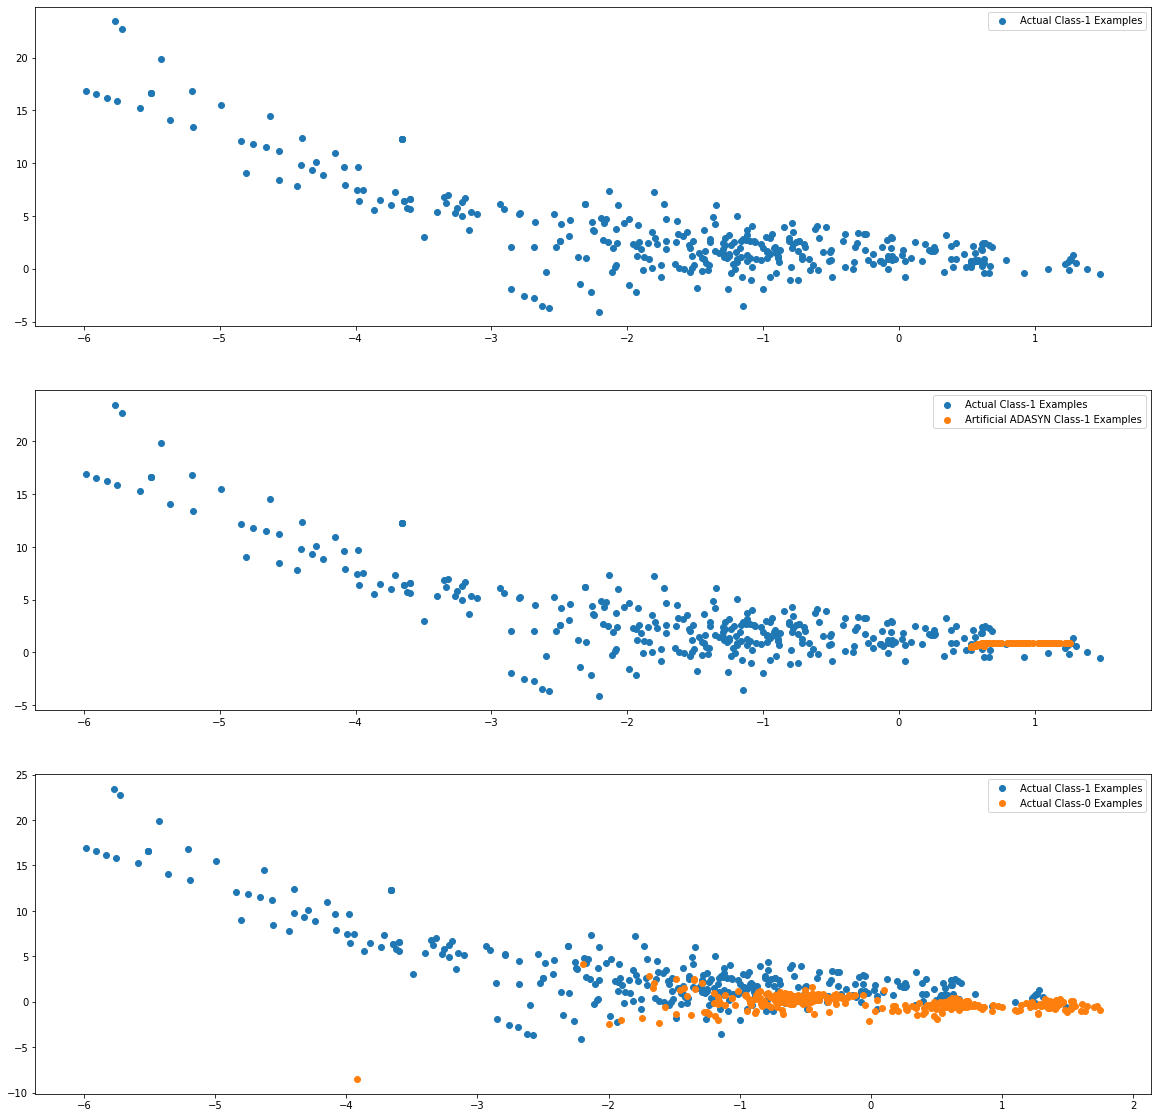

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0,sampling_strategy='minority')
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logsitic regresion on balanced data-ADASYN

In [ ]:
## Logsitic regresion on balanced data-ADASYN

cv_num =   StratifiedKFold(5)

param={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr=LogisticRegression(solver='lbfgs')
model_cvada1 = RandomizedSearchCV(estimator = lr, 
                        param_distributions = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvada1.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring

In [ ]:
cv_resultsada1 = pd.DataFrame(model_cvada1.cv_results_)
cv_resultsada1 = cv_resultsada1[cv_resultsada1['param_C']<=200]
cv_resultsada1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.358777,0.071153,0.042568,0.000833,0.001,{'C': 0.001},0.924207,0.949281,0.967919,0.930590,0.953631,0.945126,0.015862,1,0.967623,0.967903,0.963359,0.971274,0.965809,0.967194,0.002606
1,2.735721,0.162537,0.043252,0.001130,0.01,{'C': 0.01},0.924473,0.951270,0.962847,0.923433,0.957765,0.943958,0.016744,2,0.968674,0.969280,0.964963,0.972825,0.967178,0.968584,0.002591
2,3.017798,0.343841,0.044749,0.003444,0.1,{'C': 0.1},0.924109,0.951370,0.961306,0.918434,0.958463,0.942736,0.017912,3,0.968705,0.969370,0.965058,0.973027,0.967286,0.968689,0.002624
3,3.167598,0.656455,0.042337,0.001306,1,{'C': 1},0.924053,0.951371,0.961091,0.917317,0.958540,0.942474,0.018199,4,0.968702,0.969374,0.965061,0.973057,0.967293,0.968698,0.002633
4,3.110222,0.547087,0.043467,0.000746,10,{'C': 10},0.924047,0.951372,0.961071,0.917195,0.958548,0.942447,0.018232,5,0.968702,0.969374,0.965062,0.973061,0.967294,0.968698,0.002634


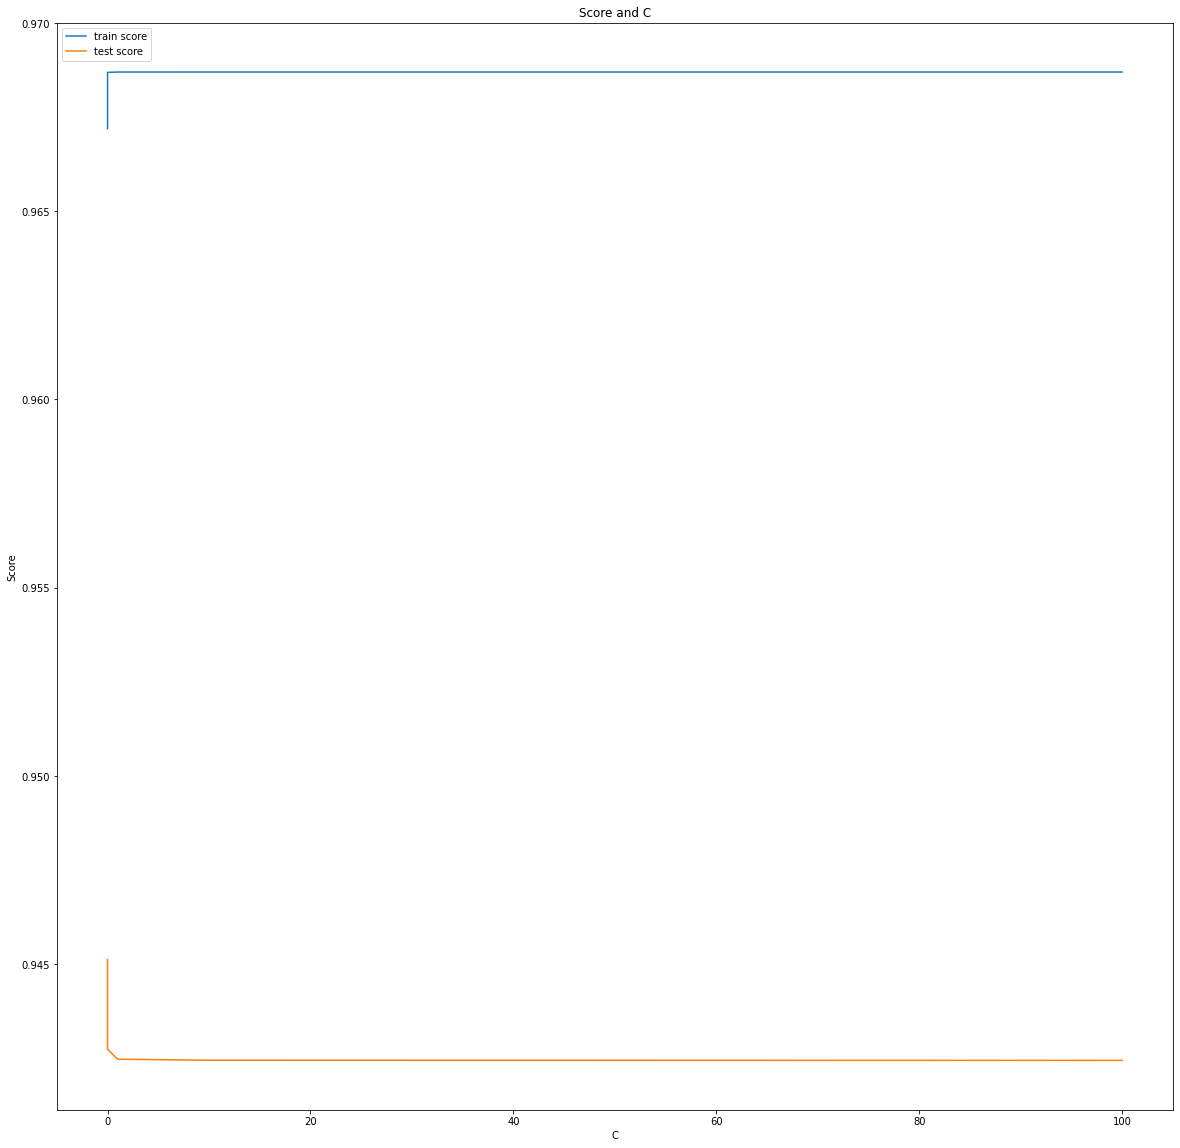

In [ ]:
# plotting mean test and train scoes with C
cv_resultsada1['param_C'] = cv_resultsada1['param_C'].astype('int32')

# plotting
plt.plot(cv_resultsada1['param_C'], cv_resultsada1['mean_train_score'])
plt.plot(cv_resultsada1['param_C'], cv_resultsada1['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.title("Score and C")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvada1.best_score_,'using',model_cvada1.best_params_)
#print the optimum value of hyperparameters

We can get auc of 0.9451255581148261 using {'C': 0.001}


## Decision Tree balanced data-ADASYN

In [ ]:
# Decision Tree on balanced data-ADASYN

cv_num =   StratifiedKFold(5)

param={'max_depth': range(1, 10)}

dt= DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

model_cvada4 = RandomizedSearchCV(estimator = dt, 
                        param_distributions = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvada4.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
  

In [ ]:
cv_resultsada4 = pd.DataFrame(model_cvada4.cv_results_)
cv_resultsada4 = cv_resultsada4[cv_resultsada4['param_max_depth']<=10]
cv_resultsada4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.653174,0.027574,0.036948,0.002724,1,{'max_depth': 1},0.753742,0.788376,0.779493,0.769242,0.793390,0.776849,0.014179,9,0.821647,0.812976,0.816625,0.818033,0.813337,0.816523,0.003203
1,5.065488,0.027326,0.036583,0.001803,2,{'max_depth': 2},0.869501,0.866690,0.919939,0.901683,0.892187,0.890000,0.020006,8,0.900219,0.898979,0.895667,0.892430,0.900064,0.897472,0.003007
2,7.389575,0.021549,0.038100,0.001076,3,{'max_depth': 3},0.925725,0.886224,0.944530,0.908379,0.928469,0.918665,0.019865,5,0.921051,0.926975,0.931354,0.926546,0.934368,0.928059,0.004544
3,9.639148,0.053386,0.039916,0.000490,4,{'max_depth': 4},0.930405,0.902977,0.962738,0.935860,0.941821,0.934760,0.019303,1,0.951106,0.947656,0.954160,0.957375,0.959649,0.953989,0.004288
4,11.881325,0.044926,0.039649,0.000446,5,{'max_depth': 5},0.890738,0.937453,0.961177,0.911494,0.953856,0.930944,0.026367,2,0.971934,0.966298,0.967269,0.971045,0.972688,0.969847,0.002573


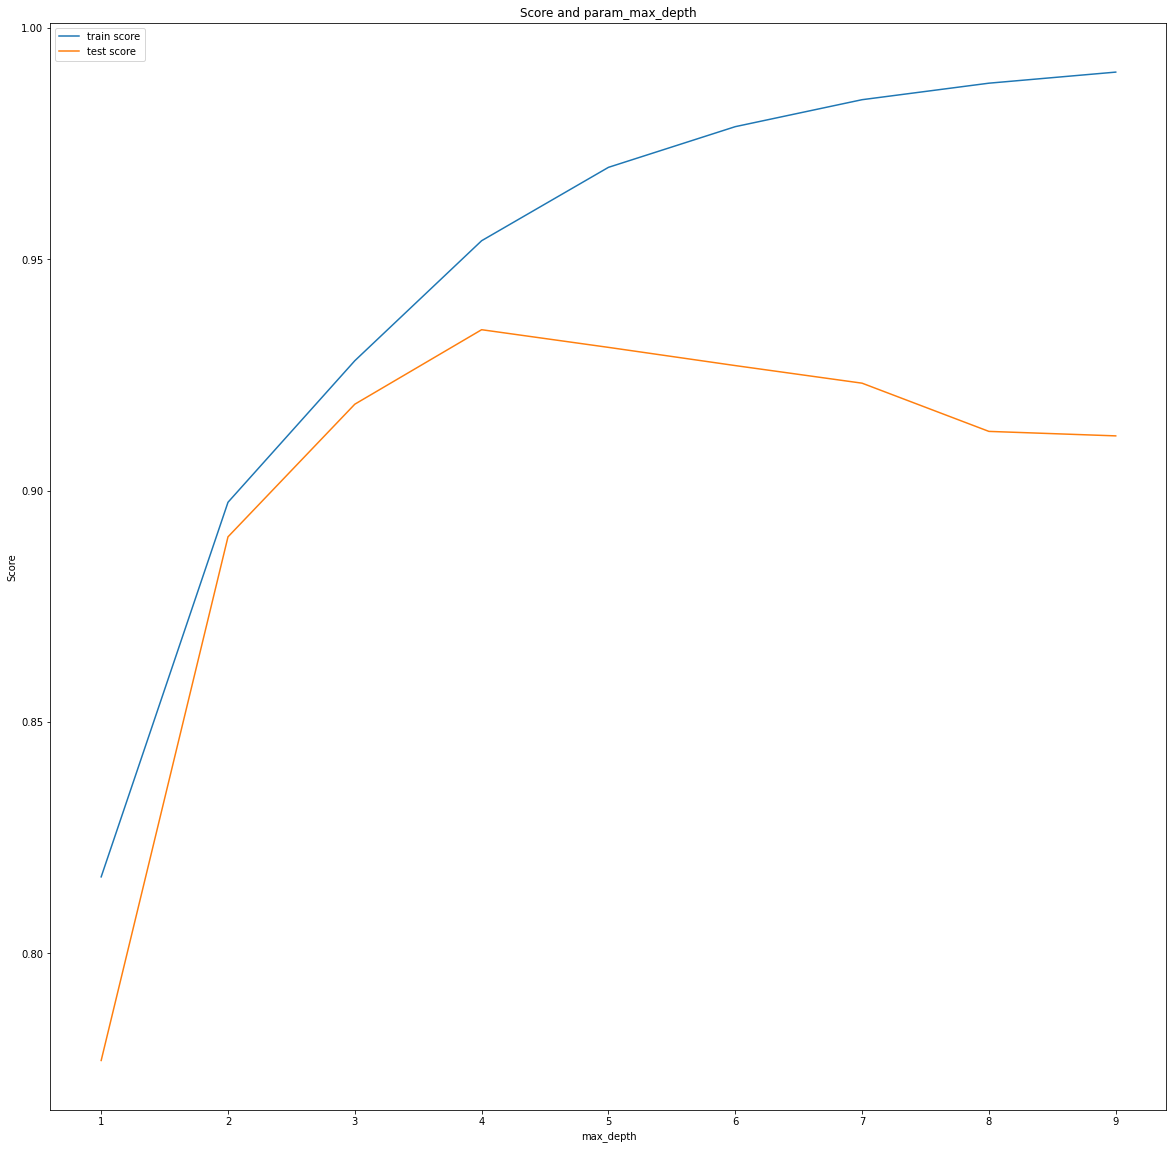

In [ ]:
cv_resultsada4['param_max_depth'] = cv_resultsada4['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultsada4['param_max_depth'], cv_resultsada4['mean_train_score'])
plt.plot(cv_resultsada4['param_max_depth'], cv_resultsada4['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvada4.best_score_,'using',model_cvada4.best_params_)

We can get auc of 0.9347600744183268 using {'max_depth': 4}


## Random forest balanced data-ADASYN

In [ ]:
# Random forest on balanced data-ADASYN

cv_num =   StratifiedKFold(5)

param={'max_depth': range(2, 20, 5)}

rf= RandomForestClassifier(warm_start=True)

model_cvada5 = RandomizedSearchCV(estimator = rf, 
                        param_distributions = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvada5.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 36.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                  

In [ ]:
cv_resultsada5 = pd.DataFrame(model_cvada5.cv_results_)
cv_resultsada5 = cv_resultsada5[cv_resultsada5['param_max_depth']<=20]
cv_resultsada5.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,62.345924,0.216534,0.528488,0.023436,2,{'max_depth': 2},0.936192,0.916312,0.963011,0.932728,0.944652,0.938579,0.015294,4,0.949386,0.950581,0.942616,0.950893,0.949678,0.948631,3.058380e-03
1,185.493392,0.796550,0.722920,0.010718,7,{'max_depth': 7},0.978343,0.976059,0.995781,0.979405,0.991252,0.984168,0.007841,3,0.996495,0.996849,0.996156,0.997046,0.997080,0.996725,3.521477e-04
2,269.125946,3.134185,0.929906,0.008189,12,{'max_depth': 12},0.968915,0.991103,0.998784,0.992190,0.997125,0.989623,0.010750,2,0.999977,0.999982,0.999972,0.999971,0.999980,0.999976,4.280827e-06
3,310.467255,10.333494,0.971736,0.070876,17,{'max_depth': 17},0.969279,0.995571,0.999339,0.992626,0.998467,0.991056,0.011141,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.887524e-09


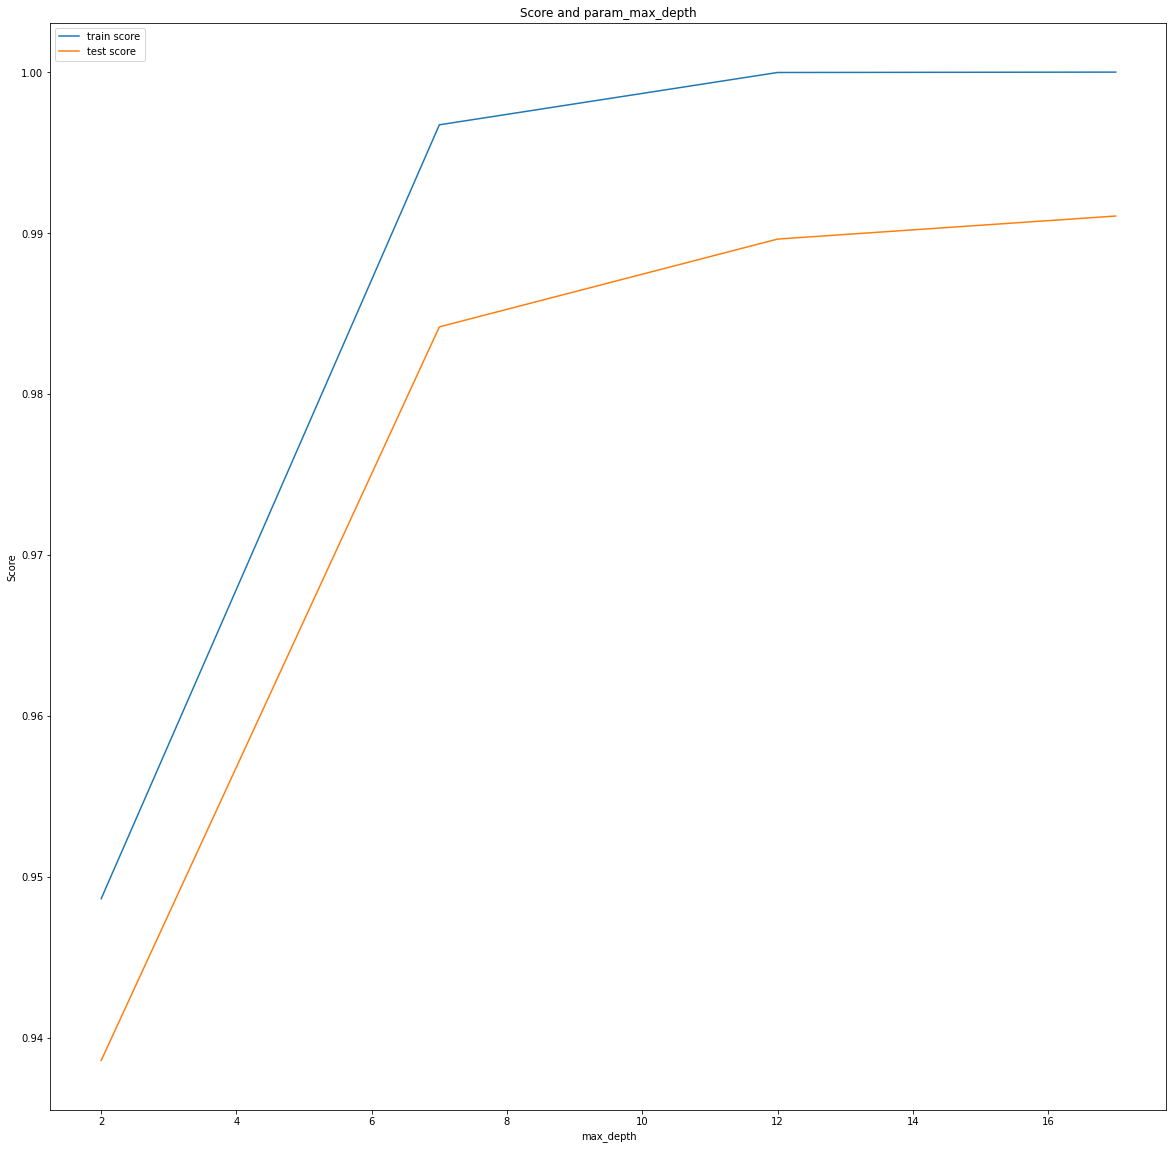

In [ ]:
cv_resultsada5['param_max_depth'] = cv_resultsada5['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_resultsada5['param_max_depth'], cv_resultsada5['mean_train_score'])
plt.plot(cv_resultsada5['param_max_depth'], cv_resultsada5['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title("Score and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvada5.best_score_,'using',model_cvada5.best_params_)

We can get auc of 0.9910562717620539 using {'max_depth': 17}


## XG Boost balanced data-ADASYN

In [ ]:
# XGboost classifier on balanced data-ADASYN

cv_num =   StratifiedKFold(5)

param={'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb= XGBClassifier(max_depth=2, n_estimators=200)

model_cvada6 = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = param, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cvada6.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 55.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
    

In [ ]:
cv_resultsada6 = pd.DataFrame(model_cvada6.cv_results_)

cv_resultsada6.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,149.080944,0.807063,0.500183,0.015644,0.9,0.5,"{'subsample': 0.9, 'learning_rate': 0.5}",0.953724,0.996716,0.999561,0.994273,0.998773,0.988609,0.017538,2,0.999960,0.999950,0.999909,0.999942,0.999929,0.999938,0.000018
1,134.763755,2.284345,0.500231,0.006948,0.6,0.3,"{'subsample': 0.6, 'learning_rate': 0.3}",0.943553,0.994304,0.999020,0.996478,0.998667,0.986404,0.021493,4,0.999754,0.999681,0.999654,0.999755,0.999684,0.999706,0.000041
2,135.690198,2.063053,0.489860,0.007184,0.6,0.1,"{'subsample': 0.6, 'learning_rate': 0.1}",0.959216,0.983870,0.995105,0.990454,0.994319,0.984593,0.013297,6,0.997766,0.997206,0.996846,0.997575,0.997222,0.997323,0.000320
3,100.356234,0.191237,0.507881,0.012558,0.3,0.5,"{'subsample': 0.3, 'learning_rate': 0.5}",0.954467,0.995373,0.999546,0.994986,0.998909,0.988656,0.017192,1,0.999913,0.999928,0.999916,0.999927,0.999901,0.999917,0.000010
4,102.179316,0.972130,0.500977,0.011731,0.3,0.3,"{'subsample': 0.3, 'learning_rate': 0.3}",0.954664,0.992208,0.999113,0.994952,0.998166,0.987821,0.016757,3,0.999760,0.999724,0.999678,0.999722,0.999696,0.999716,0.000028


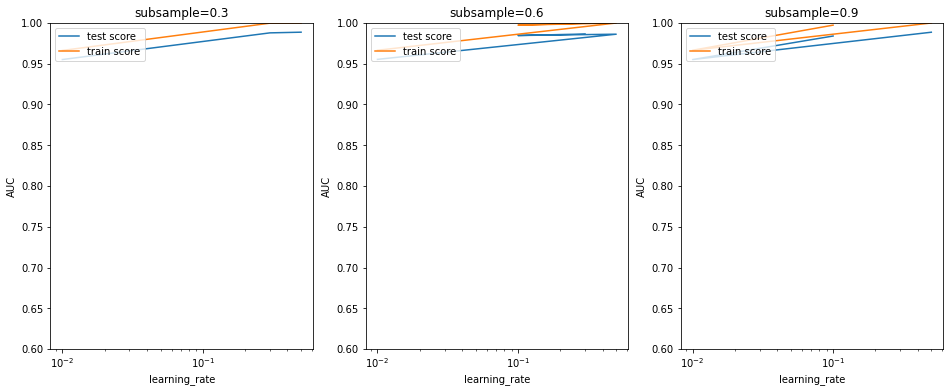

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01, 0.1, 0.3, 0.5], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param['subsample']):
    
    # subplot 1/n
    plt.subplot(1,len(param['subsample']), n+1)
    df = cv_resultsada6[cv_resultsada6['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model_cvada6.best_score_,'using',model_cvada6.best_params_)

We can get auc of 0.9886561220451444 using {'subsample': 0.3, 'learning_rate': 0.5}


## Best oversampling method & Best Model:
- Best oversampling method was 'SMOTE' which shows the best result on a model.
- Best Model was XGB model built on balance dataset (by SMOTE technique)

Applying the best hyperparameter on the model

In [ ]:
# performing Final Random Forest model with the balanced dataset by Random oversampling technique

final_model= XGBClassifier(max_depth=2, n_estimators=200, learning_rate=0.5, subsample=0.6) #initialise the model with optimum hyperparameters
final_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
# Getting the predicted values on the train set
y_train_pred_final = pd.DataFrame({'Class':y_train_smote, 'Class_Pred_Prob':final_model.predict_proba(X_train_smote)[:,1]})
y_train_pred_final.head()

,Class,Class_Pred_Prob
0,0,1.075696e-07
1,0,1.436331e-03
2,0,1.948249e-07
3,0,2.578871e-05
4,0,7.550436e-04


In [ ]:
#print the evaluation score on the X_train by choosing the best evaluation metric
print('Train auc =', roc_auc_score(y_train_pred_final.Class, y_train_pred_final.Class_Pred_Prob))

Train auc = 0.9999707958505268


#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_Pred_Prob,drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.65719604


Based on ROC curve, Best threshold value is 0.6572

### Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

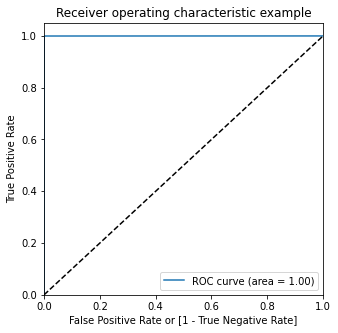

In [ ]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Pred_Prob)

#### Precision and recall tradeoff

There is always a trade off between Precision & recall. We will see this trade off through precision recall curve

In [ ]:
# Importing required python library

from sklearn.metrics import precision_recall_curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Class, y_train_pred_final.Class_Pred_Prob)

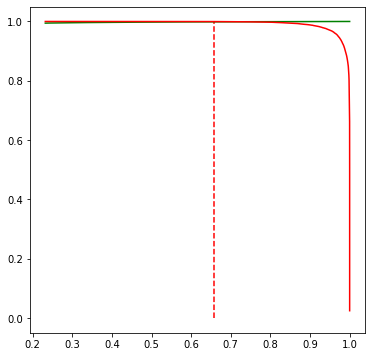

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(thresholds, p[:-1], "g-") # precision
plt.plot(thresholds, r[:-1], "r-") # recall
plt.vlines(x=0.6572, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [ ]:
y_train_pred_final['predicted_class'] = y_train_pred_final.Class_Pred_Prob.map(lambda x: 1 if x > 0.6572 else 0)

# Let's see the head
y_train_pred_final.head()

,Class,Class_Pred_Prob,predicted_class
0,0,1.075696e-07,0
1,0,1.436331e-03,0
2,0,1.948249e-07,0
3,0,2.578871e-05,0
4,0,7.550436e-04,0


We will see Important metrics that are essential to evaluate the performance of a Classification model on train & test data
- Precision & Recall
- F1 score

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Class'],y_train_pred_final['predicted_class'] )
print(confusion)

[[198782    238]
 [    71 198949]]


In [ ]:
# Defining True & False positive & negative from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculating the Precision of the model
precision=TP/float(FP+TP)
precision

0.9988051429059125

In [ ]:
# Calculating the Recall of the model
recall=TP / float(TP+FN)
recall

0.9996432519344789

In [ ]:
# Calculating the F-1 score of the model
F1_score= 2 * (precision * recall) / (precision + recall)
F1_score

0.999224021677168

For this Problem, where it's an International bank higher value of Recall shall be targeted as the Bank wants to capture maximum no. of Frauds out of actual fraud transactions as the transactions value will be high for big bank. Here, we are getting 0.9996 Recall value.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


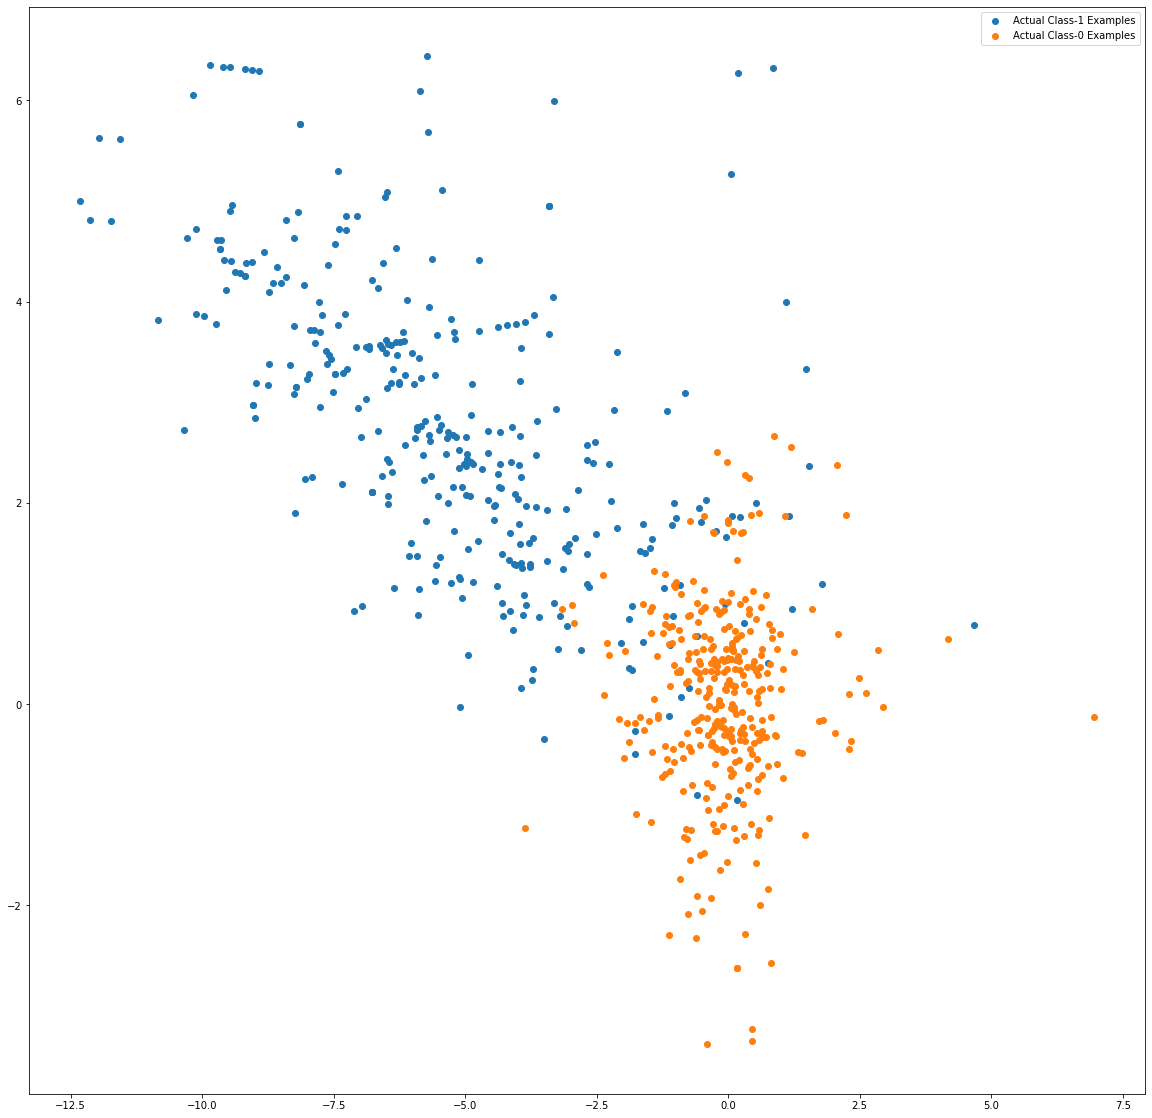

In [ ]:
var_imp = []
for i in final_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-4 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Final Model prediction on Test dataset

In [ ]:
# Getting the predicted values on the train set
y_test_pred_final = pd.DataFrame({'Class':y_test, 'Class_Pred_Prob':final_model.predict_proba(X_test)[:,1]})
y_test_pred_final.head()

,Class,Class_Pred_Prob
262922,0,3.772979e-04
123418,0,7.436191e-08
206135,0,1.967484e-08
273483,0,6.421968e-07
245758,0,6.528894e-07


In [ ]:
#print the evaluation score on the X_test by choosing the best evaluation metric
print('Test auc =', roc_auc_score(y_test_pred_final.Class, y_test_pred_final.Class_Pred_Prob))

Test auc = 1.0


In [ ]:
y_test_pred_final['predicted_class'] = y_test_pred_final.Class_Pred_Prob.map(lambda x: 1 if x > 0.6572 else 0)

# Let's see the head
y_test_pred_final.head()

,Class,Class_Pred_Prob,predicted_class
262922,0,3.772979e-04,0
123418,0,7.436191e-08,0
206135,0,1.967484e-08,0
273483,0,6.421968e-07,0
245758,0,6.528894e-07,0


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final['Class'],y_test_pred_final['predicted_class'] )
print(confusion)

[[85295     0]
 [    0   148]]


In [ ]:
# Defining True & False positive & negative from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculating the Precision of the model
precision=TP/float(FP+TP)
precision

1.0

In [ ]:
# Calculating the Recall of the model
recall=TP / float(TP+FN)
recall

1.0

In [ ]:
# Calculating the F-1 score of the model
F1_score= 2 * (precision * recall) / (precision + recall)
F1_score

1.0

We can see above that All the datapoints have been correctly classified in test dataset. This means that the final selected model is performing well on both train and test dataset.